In [ ]:
#https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization/notebook
#Predict whether the cancer is benign or malignants

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv')

In [5]:
#Summary and whatever you want
print (data.describe())
print (data.shape)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [7]:
print (data.head())
print (data.columns)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

In [9]:
data['diagnosis'].describe
y=data.diagnosis
list = ['id','Unnamed: 32','diagnosis']
x=data.drop(list,axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign: 357
Number of Malignant: 212


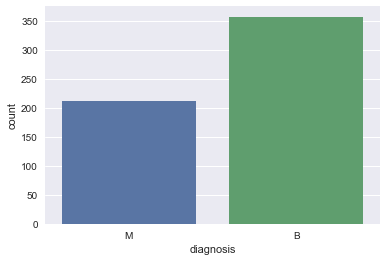

In [11]:
#counting the class label with seaborn
ax=sns.countplot(y,label='Count')
B,M =y.value_counts()
print ('Number of Benign:',B)
print ('Number of Malignant:',M)

In [12]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

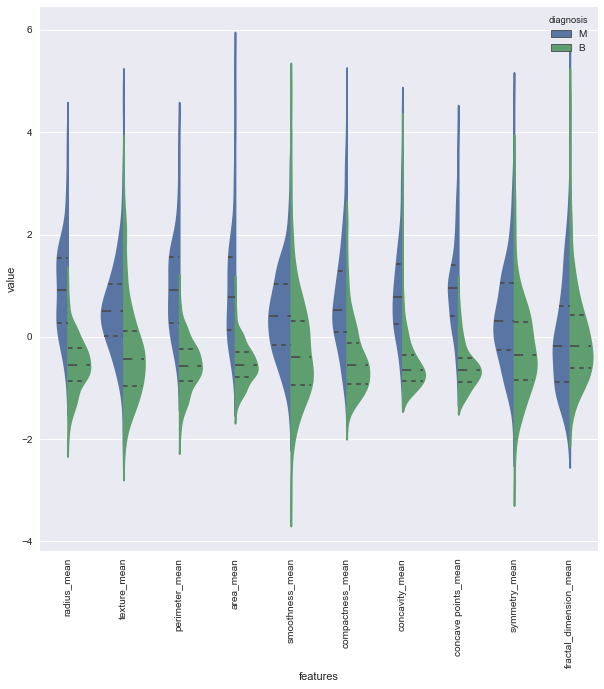

In [14]:
# Before going into visualization we tend to do standarisation becoz in summary you will find the reason
#plot features in 3 group and each group includes 10 features to observe better.
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
#Lets interpret the plot above together. For example, in texture_mean feature, median of the Malignant and Benign looks like 
#separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and 
#Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

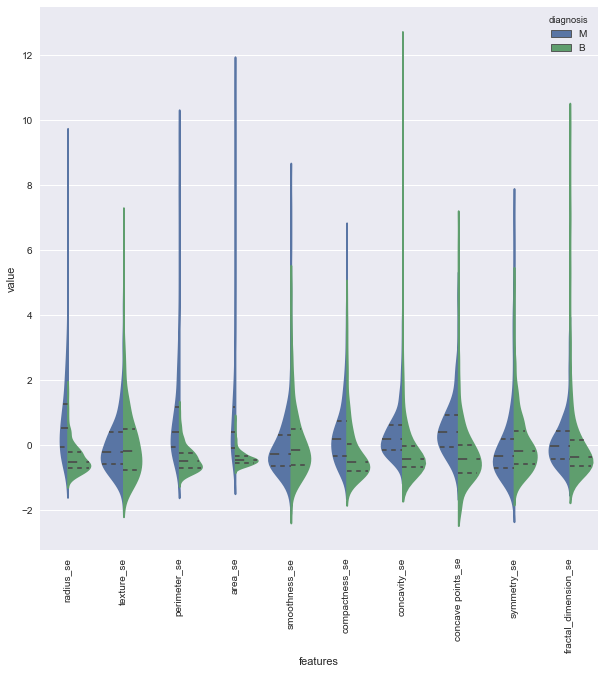

In [16]:
#SEcond ten features
data=pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

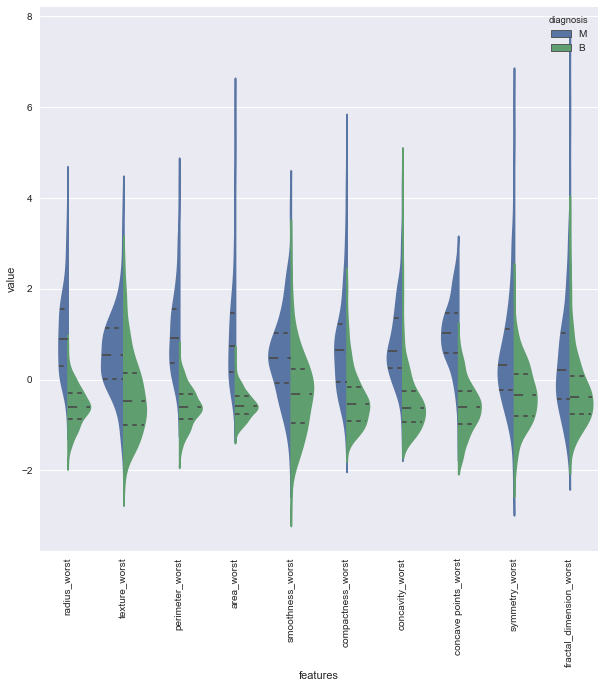

In [18]:
#Third Ten Features
data=pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=90)

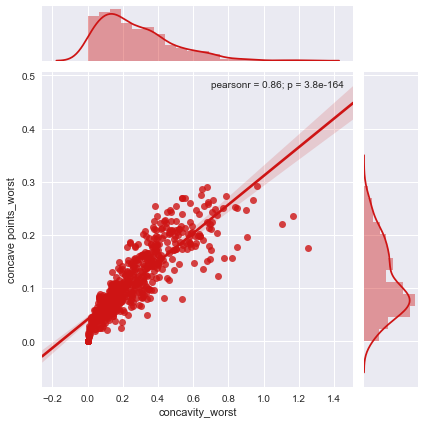

In [21]:
#loooking into 'concavity_worst' and 'concavity points_worst'
sns.jointplot(x.loc[:,'concavity_worst'],x.loc[:,'concave points_worst'],kind='regg',color='#ce1414')

#Pearson correlation Is 0.86

C:\Users\User\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


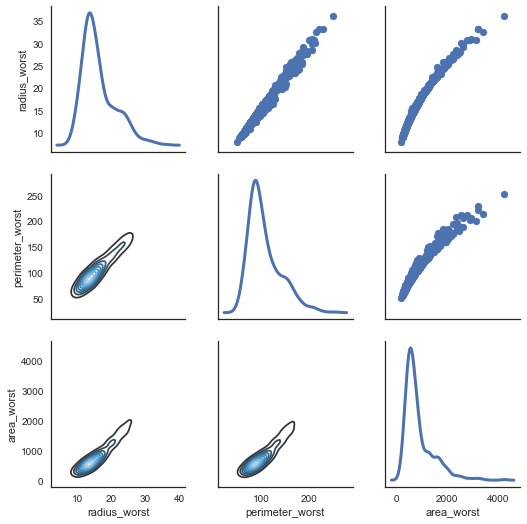

In [23]:
#what about three or more features we plot pair grid plot
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [25]:
#Now we will do swarm plot
sns.set(style='whitegrid',palette='muted')
data_dia=y
data=x
data_n_2=((data-data.mean())/data.std())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

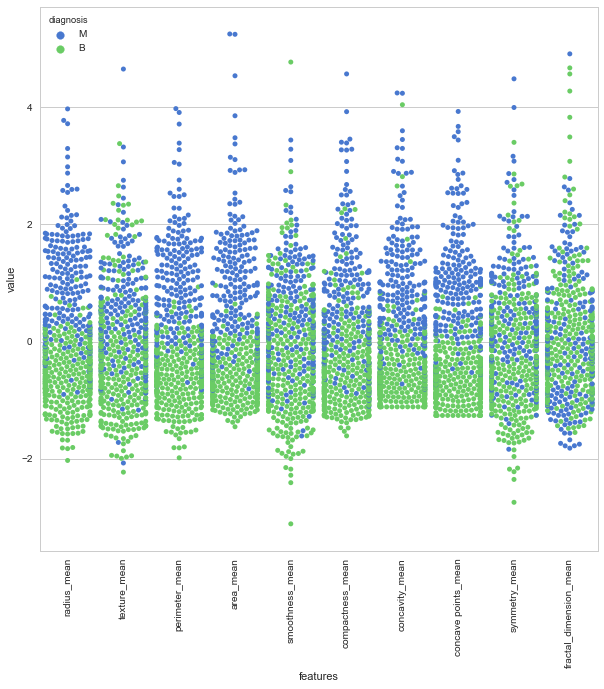

In [29]:
data=pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

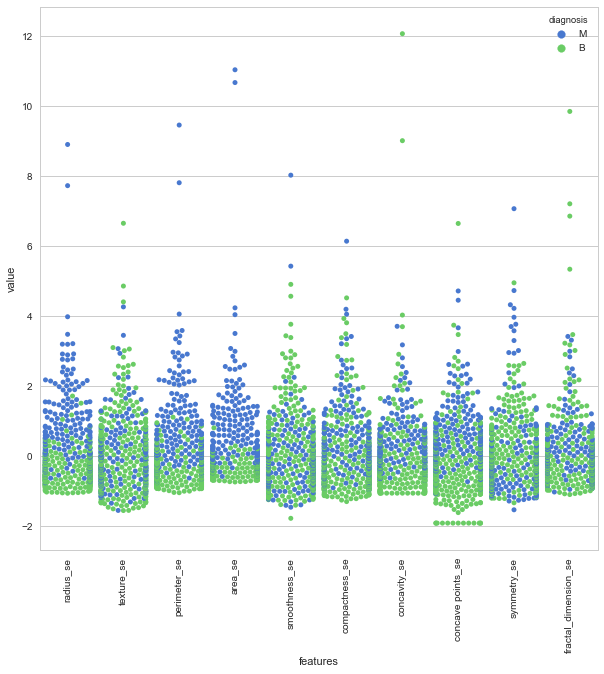

In [32]:
data=pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

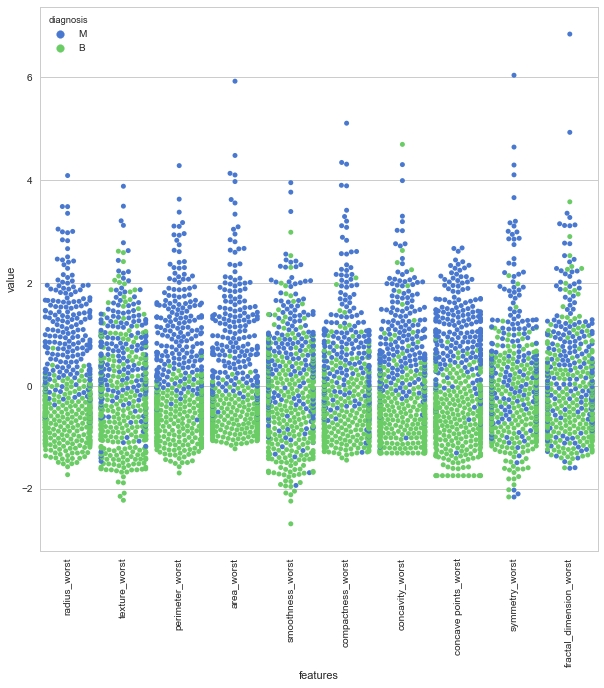

In [34]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
#toc = time.time()
plt.xticks(rotation=90)
#print("swarm plot time: ", toc-tic ," s")

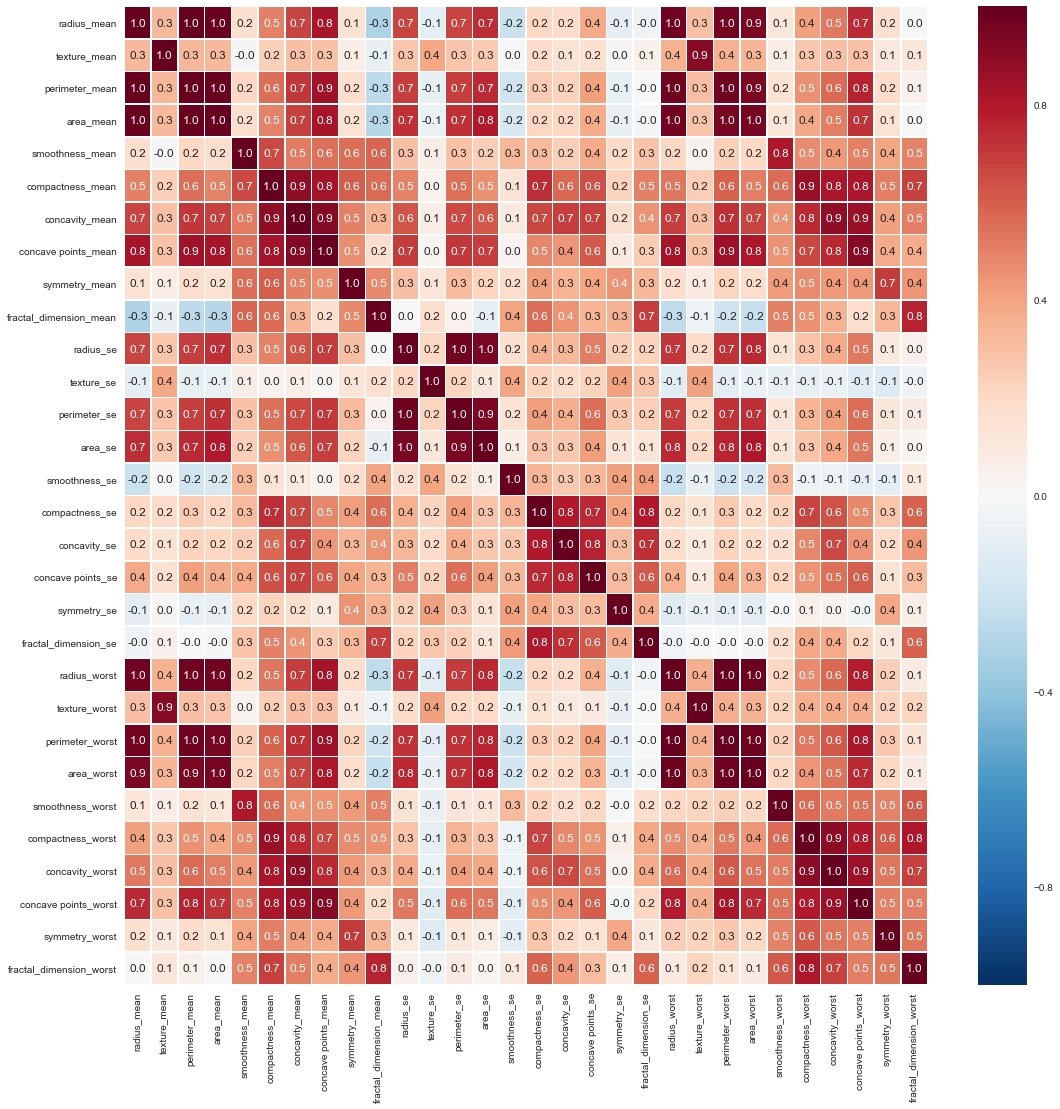

In [35]:
#if we want to see overall pearson corr
#Correlation Plot
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

In [36]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [38]:
x_1.shape

(569, 16)

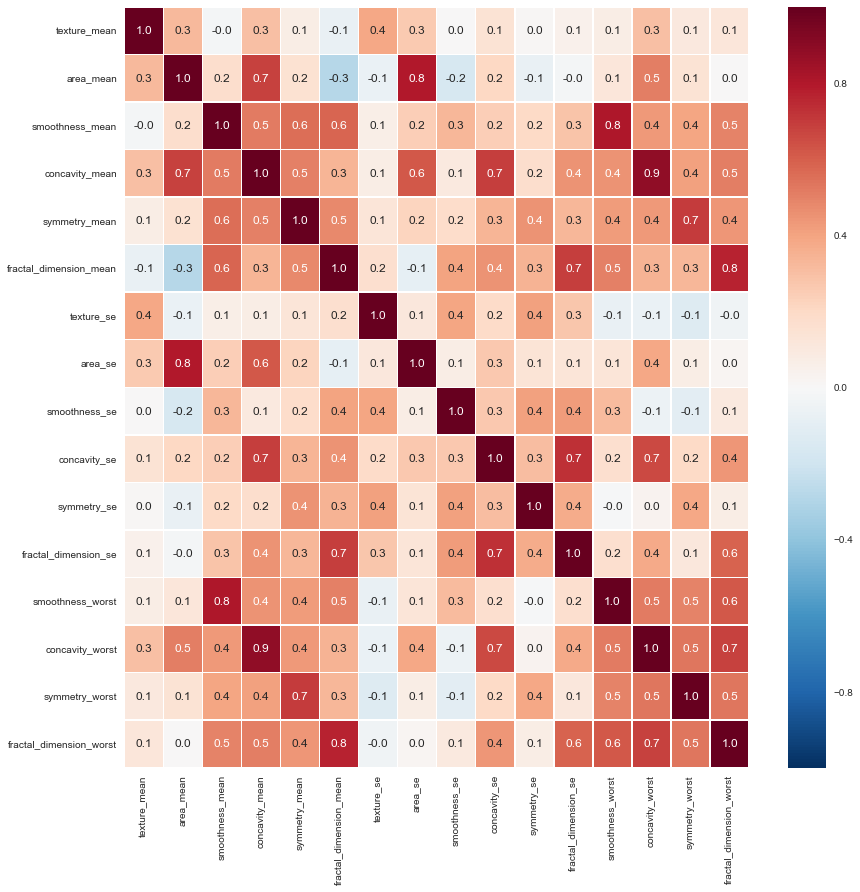

In [43]:
f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(x_1.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

In [45]:
#Building Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score

In [46]:
#Train and Test Split
x_train,x_test,y_train,y_test=train_test_split(x_1,y,test_size=0.3,random_state=42)

In [48]:
#random forest classifier with n_estimators=10 (default)
clf_rf=RandomForestClassifier(random_state=42)
clr_rf=clf_rf.fit(x_train,y_train)

In [49]:
ac=accuracy_score(y_test,clr_rf.predict(x_test))
print('accuracy score:',ac)

accuracy score: 0.959064327485


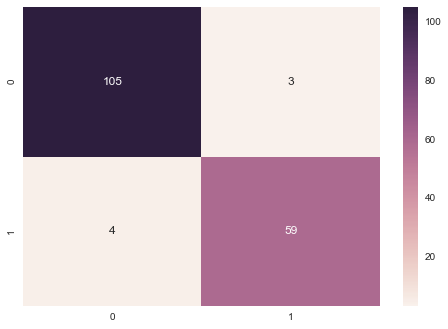

In [51]:
cm=confusion_matrix(y_test,clr_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt='d')

In [52]:
from sklearn.metrics import classification_report
print('classification report: \n',classification_report(y_test,clr_rf.predict(x_test)))

classification report: 
              precision    recall  f1-score   support

          B       0.96      0.97      0.97       108
          M       0.95      0.94      0.94        63

avg / total       0.96      0.96      0.96       171



In [54]:
#Univariate feature selection and random forest classification

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#we will find the best 5 features
select_feature=SelectKBest(chi2,k=5).fit(x_train,y_train)

In [55]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [  6.06916433e+01   3.66899557e+04   1.00015175e-01   1.30547650e+01
   1.95982847e-01   3.42575072e-04   4.07131026e-02   6.12741067e+03
   1.32470372e-03   6.92896719e-01   1.39557806e-03   2.65927071e-03
   2.63226314e-01   2.58858117e+01   1.00635138e+00   1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [56]:
#Best 5 feature to classify is that area_mean, area_se, texture_mean, concavity_worst and concavity_mean.
#now we will build our model only with those
x_train_2=select_feature.transform(x_train)
x_test_2=select_feature.transform(x_test)

#RF with  n_estimator=10 deafult
clf_rf_2=RandomForestClassifier()
clr_rf_2=clf_rf_2.fit(x_train_2,y_train)

ac_2=accuracy_score(y_test,clr_rf_2.predict(x_test_2))
print('accuracy is:',ac_2)


accuracy is: 0.947368421053


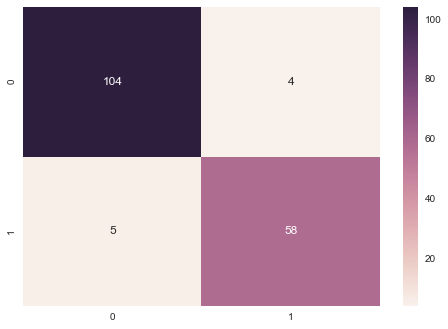

In [57]:
cm_2=confusion_matrix(y_test,clr_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt='d')

In [58]:
from sklearn.metrics import classification_report
print('classification report: \n',classification_report(y_test,clr_rf_2.predict(x_test_2)))

classification report: 
              precision    recall  f1-score   support

          B       0.95      0.96      0.96       108
          M       0.94      0.92      0.93        63

avg / total       0.95      0.95      0.95       171



In [59]:
#Recursive feature elimination (RFE) with random forest
#it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features

In [60]:
from sklearn.feature_selection import RFE
clf_rf_3= RandomForestClassifier()
rfe=RFE(estimator=clf_rf_3,n_features_to_select=5,step=1)
rfe=rfe.fit(x_train,y_train)

In [61]:
print ('chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

#it is same as above so we dont need to build our model again

chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


In [ ]:
#Recursive feature elimination with cross validation and random forest classification
#Now we will not only find best features but we also find how many features do we need for best accuracy.

In [62]:
from sklearn.feature_selection import RFECV

clf_rf_4=RandomForestClassifier()
rfecv=RFECV(estimator=clf_rf_4,step=1,cv=5,scoring='accuracy') 
rfecv=rfecv.fit(x_train,y_train)

In [63]:
print('optimal number of features:',rfecv.n_features_)
print('best features :',x_train.columns[rfecv.support_])

optimal number of features: 14
best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


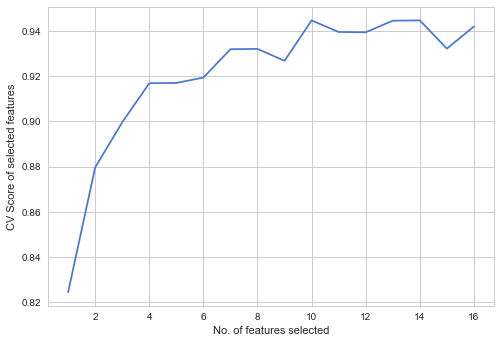

In [64]:
#Now we have found 14 features
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('No. of features selected')
plt.ylabel('CV Score of selected features')
plt.plot(range(1,len(rfecv.grid_scores_) +1),rfecv.grid_scores_)
plt.show()

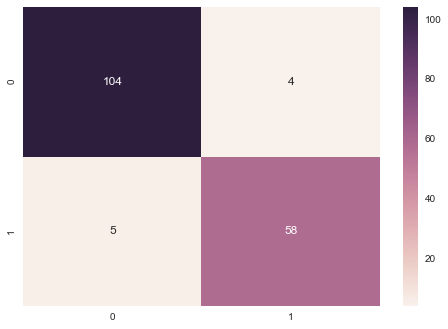

In [67]:
cm_4=confusion_matrix(y_test,rfecv.predict(x_test))
sns.heatmap(cm_2,annot=True,fmt='d')

In [68]:
from sklearn.metrics import classification_report
print('classification report: \n',classification_report(y_test,rfecv.predict(x_test)))

classification report: 
              precision    recall  f1-score   support

          B       0.97      0.97      0.97       108
          M       0.95      0.95      0.95        63

avg / total       0.96      0.96      0.96       171



In [ ]:
#Tree based feature selection and random forest classification
#n random forest classification method there is a featureimportances attributes that is the feature importances 
#(the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, 
#therefore sequence of feature importance list can change.

Feature ranking:
1. feature 13 (0.261796)
2. feature 3 (0.188315)
3. feature 1 (0.119569)
4. feature 7 (0.103076)
5. feature 9 (0.098021)
6. feature 0 (0.063615)
7. feature 12 (0.031844)
8. feature 14 (0.026323)
9. feature 11 (0.021037)
10. feature 10 (0.018792)
11. feature 2 (0.016353)
12. feature 15 (0.013888)
13. feature 6 (0.012161)
14. feature 5 (0.012096)
15. feature 8 (0.007831)
16. feature 4 (0.005283)


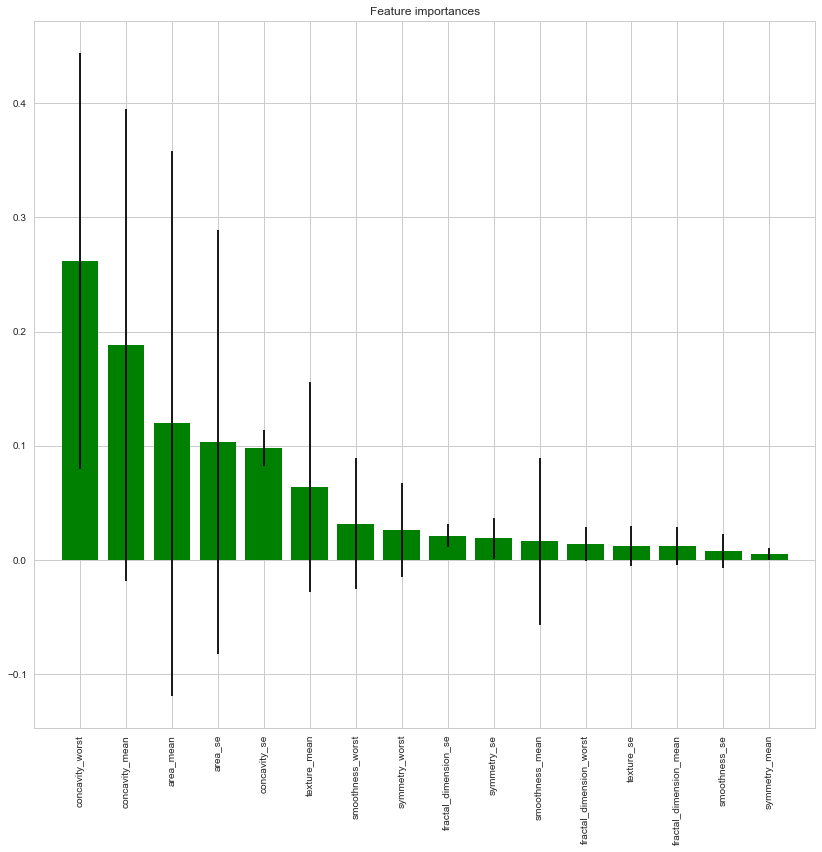

In [69]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
#Feature Extraction
#PCA

In [70]:
#Splitting data into Train and Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [73]:
#Normalisation
x_train_n=(x_train-x_train.mean())/(x_train.max() - x_train.min())
x_test_n= (x_test-x_test.mean())/(x_test.max() - x_test.min())

In [74]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train_n)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

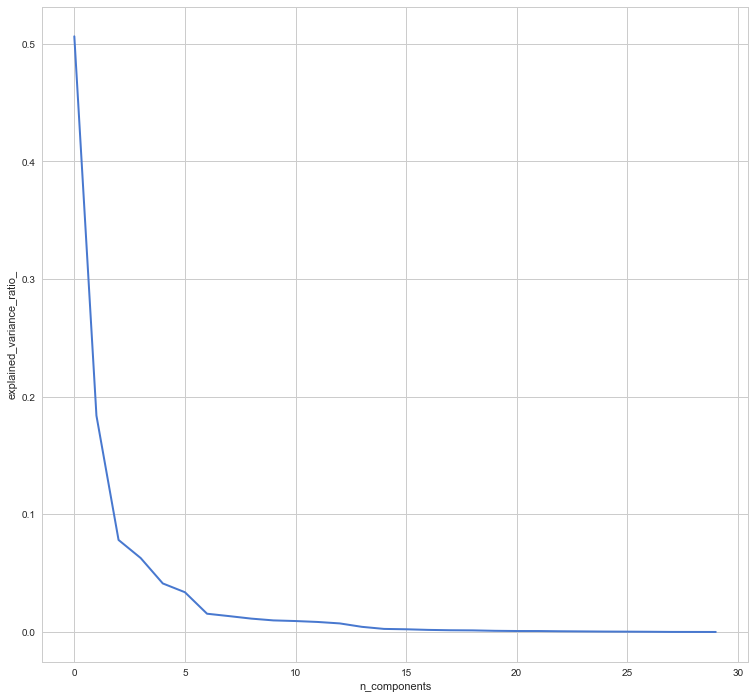

In [75]:
plt.figure(1,figsize=(14,13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')